In [1]:
import pandas as pd
import numpy as np

In [2]:
df_artist_collab = pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Artist Collaboration Network/global/entire-table-preprocessing.csv",converters={"song_ids": lambda x: x.strip("[]").replace("'","").split(", ")})
df_artist_collab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist_1  3061 non-null   object
 1   artist_2  3061 non-null   object
 2   count     3061 non-null   int64 
 3   song_ids  3061 non-null   object
dtypes: int64(1), object(3)
memory usage: 95.8+ KB


In [3]:
df_artist_collab = df_artist_collab.explode('song_ids',ignore_index=True)
df_artist_collab


,artist_1,artist_2,count,song_ids
0,Dalex,Lenny Tavárez,11,1Xnn1TPyr5h0hpRAT4B4EA
1,Dalex,Lenny Tavárez,11,5Id5B3dxJZhPcV9GzgYZZe
2,Dalex,Lenny Tavárez,11,7anSoGdgtmJTAPZBzcPhO6
3,Dalex,Lenny Tavárez,11,224EVTFiLsdQignUFLvDeH
4,Dalex,Lenny Tavárez,11,1tpbAGsGpZee5jDHMcLrUJ
...,...,...,...,...
4185,Manuel Turizo,Zion & Lennox,1,2ktoFujjJtantyMoVdBJlX
4186,Kelsea Ballerini,The Chainsmokers,1,4NBTZtAt1F13VvlSKe6KTl
4187,Apache 207,Sido,1,2u8AXJyk8pICzj2wyPBL0b
4188,21 Savage,Metro Boomin,1,0AluA5RNsa4Cx6XRhf2hWZ


In [4]:
# %%
df_artist_collab.drop('count', axis=1,inplace=True)
df_artist_collab.rename(columns={"song_ids":"song_id"},inplace=True)
df_artist_collab



,artist_1,artist_2,song_id
0,Dalex,Lenny Tavárez,1Xnn1TPyr5h0hpRAT4B4EA
1,Dalex,Lenny Tavárez,5Id5B3dxJZhPcV9GzgYZZe
2,Dalex,Lenny Tavárez,7anSoGdgtmJTAPZBzcPhO6
3,Dalex,Lenny Tavárez,224EVTFiLsdQignUFLvDeH
4,Dalex,Lenny Tavárez,1tpbAGsGpZee5jDHMcLrUJ
...,...,...,...
4185,Manuel Turizo,Zion & Lennox,2ktoFujjJtantyMoVdBJlX
4186,Kelsea Ballerini,The Chainsmokers,4NBTZtAt1F13VvlSKe6KTl
4187,Apache 207,Sido,2u8AXJyk8pICzj2wyPBL0b
4188,21 Savage,Metro Boomin,0AluA5RNsa4Cx6XRhf2hWZ


In [5]:
# %%
df_song = pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Hit Songs/spotify_hits_dataset_complete.csv",converters={"artist_name": lambda x: x.strip("[]").replace("'","").split(", ")},sep="\t")
df_song = df_song[df_song["song_type"] != "Solo"]
df_song = df_song.reset_index(drop=True)

#df_song.drop("index",inplace=True)
df_song.head()

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3,0.0209,0.614,0.6410,0.000000,0.0659,-6.751,0.2880,0.4920,123.539
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,4,0.9690,0.150,0.0577,0.363000,0.0873,-21.255,0.0362,0.0701,71.564
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,4,0.0640,0.572,0.7970,0.000000,0.1050,-3.995,0.0483,0.2520,135.006
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,4,0.2800,0.610,0.3970,0.000000,0.0833,-8.506,0.0504,0.7180,129.761
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,4,0.1630,0.827,0.5220,0.000001,0.1090,-4.866,0.0845,0.4770,151.990


In [6]:
df_song.shape

(4987, 24)

# Artist table load

In [7]:
df_artists=pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Artists/spotify_artists_info_complete.csv", sep="\t")
df_artists.drop("image_url",axis=1,inplace=True)
df_artists.rename(columns={"name":"artist_name"},inplace=True)
df_artists.head()

,artist_id,artist_name,followers,popularity,genres
0,1WgXqy2Dd70QQOU7Ay074N,AURORA,923204,75,['norwegian pop']
1,2dXKh2aHr7RS2RVPlWJoUS,MHD,2707,24,[]
2,293zczrfYafIItmnmM3coR,Chuck Berry,1103439,67,"['blues rock', 'classic rock', 'folk rock', 'r..."
3,4DqRDyrUuJO8CuxfgVCU3m,Hasan.K,38,29,[]
4,1U5zgr455OGyIkLNXvDdrf,Traditional,26672,64,['sleep']


In [8]:
df_artists.shape

(3612, 5)

# Combining as 2 artist per song

In [9]:
import pandas as pd
from itertools import combinations

# Assuming merged_df is the DataFrame with columns artist_1, artist_2, and artist_name

# Create an empty list to store the new DataFrames
new_dfs = []

# Define a function to process each row
def fill_artists(row):
    artists_list = row['artist_name']
    if artists_list:
        if len(artists_list) == 2:
            # If there are 2 artists, fill artist_1 and artist_2 accordingly
            row['artist_1'] = artists_list[0]
            row['artist_2'] = artists_list[1]
            new_dfs.append(row.to_frame().transpose())
        elif len(artists_list) > 2:
            # If there are more than 2 artists, create new rows for each combination
            top_artists = sorted(artists_list, key=lambda x: df_artists[df_artists['artist_name'].isin(artists_list)]['followers'].max(), reverse=True)[:2]
            row['artist_1'] = top_artists[0]
            row['artist_2'] = top_artists[1]
            new_dfs.append(row.to_frame().transpose())
    else:
        new_dfs.append(row.to_frame().transpose())

# Apply the function to each row of the DataFrame
df_song.apply(fill_artists, axis=1)

# Concatenate the new DataFrames into a single DataFrame
new_rows_df = pd.concat(new_dfs, ignore_index=True)

# Print the updated DataFrame
print(new_rows_df)

                     song_id  \
0     0MET90crciVlxlE07ub7Rn   
1     6FxCPvx8Ovm9y77DO6vuy5   
2     2Wr970IfovsSGnfkE08iMF   
3     2kPpxNSgXRvu5yqkRLKJIu   
4     5sCwso3aURYAdieWEFI1nE   
...                      ...   
4982  26bMmC90QF0FOd1ctDnkeU   
4983  1oBsrVp5CpLVpxX0WdHQvt   
4984  4W598w0KcHVG5Nwqk0qMpj   
4985  3at8iNHLzE5EizkFWoQzCK   
4986  2Gl0FzuLxflY6nPifJp5Dr   

                                              song_name  \
0                          Good Love (feat. Tory Lanez)   
1     Main Title "Somewhere in My Memory" (From "Hom...   
2                                               Find Me   
3     Winter Wonderland / Don't Worry Be Happy (feat...   
4                                Icy (feat. Gucci Mane)   
...                                                 ...   
4982                                  Mulherão da Porra   
4983                                             Dealer   
4984                                              Three   
4985                     

In [10]:
new_rows_df

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.15,0.0577,0.363,0.0873,-21.255,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,0.572,0.797,0.0,0.105,-3.995,0.0483,0.252,135.006,Sigma,Birdy
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,0.61,0.397,0.0,0.0833,-8.506,0.0504,0.718,129.761,Pentatonix,Tori Kelly
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,0.827,0.522,0.000001,0.109,-4.866,0.0845,0.477,151.99,Logic,Gucci Mane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,26bMmC90QF0FOd1ctDnkeU,Mulherão da Porra,"['0OWtaM1z81DliQXntU4KaN', '6OpOg5HVCc8xVf7OVr...","[Munhoz & Mariano, Jerry Smith]",48,True,Collaboration,1,2,79,...,0.811,0.696,0.0,0.196,-5.209,0.0553,0.44,128.031,Munhoz & Mariano,Jerry Smith
4983,1oBsrVp5CpLVpxX0WdHQvt,Dealer,"['10XY9PZCJKzUFzZOdtlQLU', '0b62itBWBdLgiecXjX...","[LX, Maxwell]",0,True,Collaboration,1,2,0,...,0.614,0.763,0.0,0.19,-5.75,0.394,0.376,128.069,LX,Maxwell
4984,4W598w0KcHVG5Nwqk0qMpj,Three,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...","[Future, Young Thug]",51,True,Collaboration,2,2,69,...,0.725,0.692,0.0,0.0912,-5.742,0.257,0.298,169.025,Future,Young Thug
4985,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","[Lorenzo, LES ANTICIPATEURS]",52,True,Collaboration,7,2,79,...,0.755,0.737,0.0,0.116,-5.77,0.0505,0.753,145.961,Lorenzo,LES ANTICIPATEURS


In [11]:
new_rows_df.isna().sum()

song_id                   0
song_name                18
artist_id                 0
artist_name               0
popularity                0
explicit                  0
song_type                 0
track_number              0
num_artists               0
num_available_markets     0
release_date              0
duration_ms               0
key                       0
mode                      0
time_signature            0
acousticness              0
danceability              0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
speechiness               0
valence                   0
tempo                     0
artist_1                  0
artist_2                  0
dtype: int64

In [12]:
new_rows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_id                4987 non-null   object
 1   song_name              4969 non-null   object
 2   artist_id              4987 non-null   object
 3   artist_name            4987 non-null   object
 4   popularity             4987 non-null   object
 5   explicit               4987 non-null   object
 6   song_type              4987 non-null   object
 7   track_number           4987 non-null   object
 8   num_artists            4987 non-null   object
 9   num_available_markets  4987 non-null   object
 10  release_date           4987 non-null   object
 11  duration_ms            4987 non-null   object
 12  key                    4987 non-null   object
 13  mode                   4987 non-null   object
 14  time_signature         4987 non-null   object
 15  acousticness         

In [13]:
new_rows_df[new_rows_df['song_name'].isna()]

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
235,5TTzhRSWQS4Yu8xTgAuq6D,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,13,2,0,...,0.465,0.82,0.0,0.0888,-5.907,0.307,0.505,86.839,,
486,5rbXOUQCaYcSnW5EOgfVaD,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,19,2,0,...,0.789,0.794,0.0,0.108,-5.876,0.1,0.334,108.852,,
596,4nbg6j4t38jiFdwXt3kiLQ,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,15,2,0,...,0.419,0.688,0.0,0.104,-7.332,0.361,0.149,79.145,,
603,20yDAohnjeOlLpnogPhnCO,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,12,2,0,...,0.485,0.693,0.0,0.49,-6.478,0.288,0.567,89.568,,
1054,5WkVuwmvmbmysXlKtdfkRD,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,11,2,0,...,0.608,0.631,0.000001,0.287,-7.096,0.414,0.146,119.201,,
1216,7CbkW1lLxOM5D6YWTnzknv,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,9,2,0,...,0.547,0.881,0.0,0.386,-5.994,0.31,0.44,86.628,,
1227,1xSTaiXN33Y5chE2bFixVo,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,1,2,0,...,0.426,0.722,0.0,0.117,-5.112,0.388,0.393,93.014,,
1716,2ohk9OZFaYwo8UrRm3ewqq,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,14,2,0,...,0.526,0.717,0.0,0.117,-6.744,0.439,0.354,147.437,,
2734,667XbVuYeoYAVUBzB9Z7Q8,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,17,2,0,...,0.492,0.688,0.0,0.0566,-6.913,0.316,0.29,175.801,,
3191,34IY2117PizF4NoRPoMth6,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,3,2,0,...,0.727,0.757,0.0,0.115,-5.785,0.14,0.647,150.002,,


In [14]:
# Assuming new_rows_df is the DataFrame you want to modify

# Drop rows where song_name is NaN
new_rows_df.dropna(subset=['song_name'], inplace=True)

# Reset the index after dropping rows
new_rows_df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(new_rows_df)

                     song_id  \
0     0MET90crciVlxlE07ub7Rn   
1     6FxCPvx8Ovm9y77DO6vuy5   
2     2Wr970IfovsSGnfkE08iMF   
3     2kPpxNSgXRvu5yqkRLKJIu   
4     5sCwso3aURYAdieWEFI1nE   
...                      ...   
4964  26bMmC90QF0FOd1ctDnkeU   
4965  1oBsrVp5CpLVpxX0WdHQvt   
4966  4W598w0KcHVG5Nwqk0qMpj   
4967  3at8iNHLzE5EizkFWoQzCK   
4968  2Gl0FzuLxflY6nPifJp5Dr   

                                              song_name  \
0                          Good Love (feat. Tory Lanez)   
1     Main Title "Somewhere in My Memory" (From "Hom...   
2                                               Find Me   
3     Winter Wonderland / Don't Worry Be Happy (feat...   
4                                Icy (feat. Gucci Mane)   
...                                                 ...   
4964                                  Mulherão da Porra   
4965                                             Dealer   
4966                                              Three   
4967                     

In [15]:
new_rows_df

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.15,0.0577,0.363,0.0873,-21.255,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,0.572,0.797,0.0,0.105,-3.995,0.0483,0.252,135.006,Sigma,Birdy
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,0.61,0.397,0.0,0.0833,-8.506,0.0504,0.718,129.761,Pentatonix,Tori Kelly
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,0.827,0.522,0.000001,0.109,-4.866,0.0845,0.477,151.99,Logic,Gucci Mane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,26bMmC90QF0FOd1ctDnkeU,Mulherão da Porra,"['0OWtaM1z81DliQXntU4KaN', '6OpOg5HVCc8xVf7OVr...","[Munhoz & Mariano, Jerry Smith]",48,True,Collaboration,1,2,79,...,0.811,0.696,0.0,0.196,-5.209,0.0553,0.44,128.031,Munhoz & Mariano,Jerry Smith
4965,1oBsrVp5CpLVpxX0WdHQvt,Dealer,"['10XY9PZCJKzUFzZOdtlQLU', '0b62itBWBdLgiecXjX...","[LX, Maxwell]",0,True,Collaboration,1,2,0,...,0.614,0.763,0.0,0.19,-5.75,0.394,0.376,128.069,LX,Maxwell
4966,4W598w0KcHVG5Nwqk0qMpj,Three,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...","[Future, Young Thug]",51,True,Collaboration,2,2,69,...,0.725,0.692,0.0,0.0912,-5.742,0.257,0.298,169.025,Future,Young Thug
4967,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","[Lorenzo, LES ANTICIPATEURS]",52,True,Collaboration,7,2,79,...,0.755,0.737,0.0,0.116,-5.77,0.0505,0.753,145.961,Lorenzo,LES ANTICIPATEURS


In [16]:
merged_df_with_artist1 = pd.merge(new_rows_df,df_artists,left_on='artist_1', right_on='artist_name')
merged_df_with_artist1.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,speechiness,valence,tempo,artist_1,artist_2,artist_id_y,artist_name_y,followers,popularity_y,genres
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
1,2sMkhUglKashsCjp76uOB9,Like a Film (feat. M Huncho),"['3dKjmeRZcSUw617CoMzEA0', '491U1PrV1EoQuhM0aU...","[Nafe Smallz, M Huncho]",51,True,Collaboration,1,2,79,...,0.227,0.416,130.068,Nafe Smallz,M Huncho,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
2,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
3,2BCB7BfbOxdRrIrzf8qLh4,Fake Love (feat. Yxng Bane),"['3dKjmeRZcSUw617CoMzEA0', '5AbLpsnTQVNB3OEadY...","[Nafe Smallz, Yxng Bane]",59,True,Collaboration,7,2,79,...,0.491,0.307,84.23,Nafe Smallz,Yxng Bane,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
4,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra,3dRfiJ2650SZu6GbydcHNb,John Williams,856056,76,['soundtrack']


In [17]:
merged_df_with_artist1.rename(columns={"artist_id_y":"artist_id_1", "artist_name_y":"artist_name_1","followers":"followers_artist1","popularity":"popularity_artist1","genres":"genres_artist1"},inplace=True)
merged_df_with_artist1.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,speechiness,valence,tempo,artist_1,artist_2,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
1,2sMkhUglKashsCjp76uOB9,Like a Film (feat. M Huncho),"['3dKjmeRZcSUw617CoMzEA0', '491U1PrV1EoQuhM0aU...","[Nafe Smallz, M Huncho]",51,True,Collaboration,1,2,79,...,0.227,0.416,130.068,Nafe Smallz,M Huncho,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
2,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
3,2BCB7BfbOxdRrIrzf8qLh4,Fake Love (feat. Yxng Bane),"['3dKjmeRZcSUw617CoMzEA0', '5AbLpsnTQVNB3OEadY...","[Nafe Smallz, Yxng Bane]",59,True,Collaboration,7,2,79,...,0.491,0.307,84.23,Nafe Smallz,Yxng Bane,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
4,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra,3dRfiJ2650SZu6GbydcHNb,John Williams,856056,76,['soundtrack']


In [18]:
merged_df_with_artist2 = pd.merge(merged_df_with_artist1,df_artists,left_on='artist_2', right_on='artist_name')
merged_df_with_artist2.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1,artist_id,artist_name,followers,popularity,genres
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez]",61,True,Collaboration,12,2,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,Collaboration,15,3,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"['0b62itBWBdLgiecXjXCqKC', '2jku7tDXc6XoB6MO2h...","[Maxwell, Tory Lanez, Gzuz]",41,True,Collaboration,6,3,76,...,0b62itBWBdLgiecXjXCqKC,Maxwell,146136,72,"['deep german hip hop', 'german hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [19]:
merged_df_with_artist2.rename(columns={"artist_id":"artist_id_2","artist_name":"artist_name_2","followers":"followers_artist2","popularity":"popularity_artist2","genres":"genres_artist2"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1,artist_id_2,artist_name_2,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez]",61,True,Collaboration,12,2,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,Collaboration,15,3,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"['0b62itBWBdLgiecXjXCqKC', '2jku7tDXc6XoB6MO2h...","[Maxwell, Tory Lanez, Gzuz]",41,True,Collaboration,6,3,76,...,0b62itBWBdLgiecXjXCqKC,Maxwell,146136,72,"['deep german hip hop', 'german hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [20]:
merged_df_with_artist2.isna().sum()

song_id                  0
song_name                0
artist_id_x              0
artist_name_x            0
popularity_x             0
explicit                 0
song_type                0
track_number             0
num_artists              0
num_available_markets    0
release_date             0
duration_ms              0
key                      0
mode                     0
time_signature           0
acousticness             0
danceability             0
energy                   0
instrumentalness         0
liveness                 0
loudness                 0
speechiness              0
valence                  0
tempo                    0
artist_1                 0
artist_2                 0
artist_id_1              0
artist_name_1            0
followers_artist1        0
popularity_y             0
genres_artist1           0
artist_id_2              0
artist_name_2            0
followers_artist2        0
popularity_artist2       0
genres_artist2           0
dtype: int64

In [21]:
merged_df_with_artist2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5180
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_id                5181 non-null   object
 1   song_name              5181 non-null   object
 2   artist_id_x            5181 non-null   object
 3   artist_name_x          5181 non-null   object
 4   popularity_x           5181 non-null   object
 5   explicit               5181 non-null   object
 6   song_type              5181 non-null   object
 7   track_number           5181 non-null   object
 8   num_artists            5181 non-null   object
 9   num_available_markets  5181 non-null   object
 10  release_date           5181 non-null   object
 11  duration_ms            5181 non-null   object
 12  key                    5181 non-null   object
 13  mode                   5181 non-null   object
 14  time_signature         5181 non-null   object
 15  acousticness         

In [22]:
merged_df_with_artist2.drop(["artist_id_x","song_type","artist_id_1","artist_name_1","artist_id_2","artist_name_2"],axis=1,inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_x,popularity_x,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_y,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [23]:
merged_df_with_artist2.rename(columns={"popularity_x":"song_popularity"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_x,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_y,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [24]:
merged_df_with_artist2.rename(columns={"artist_name_x":"artist_name_list","popularity_y":"popularity_artist1"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_list,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [25]:
duplicate_values = merged_df_with_artist2['song_id'].duplicated()
print(duplicate_values)

0       False
1       False
2       False
3       False
4       False
        ...  
5176    False
5177    False
5178    False
5179    False
5180    False
Name: song_id, Length: 5181, dtype: bool


In [26]:
boolean = not merged_df_with_artist2["song_id"].is_unique      # True (credit to @Carsten)
boolean = merged_df_with_artist2['song_id'].duplicated().any() # True
boolean

True

# Remove identifiers

In [27]:
merged_df_with_artist2.drop(["song_id","song_name","artist_name_list"],axis=1,inplace=True)
merged_df_with_artist2

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,2,79,2019-06-21,192000,8,0,3,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,2,79,2019-06-13,192000,8,0,3,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,2,79,2019-11-22,193933,5,1,4,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,3,79,2018-11-09,185828,7,1,4,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,3,76,2017-03-24,224967,2,1,5,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,62,True,1,3,79,2019-02-21,163246,5,0,4,...,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[]
5177,54,False,1,2,76,2017-06-02,201240,6,1,4,...,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']"
5178,2,False,2,2,0,2016-06-03,212693,9,0,4,...,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']"
5179,20,False,1,2,79,2018-12-21,178316,6,1,4,...,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi..."


In [28]:
merged_df_with_artist2.columns

Index(['song_popularity', 'explicit', 'track_number', 'num_artists',
       'num_available_markets', 'release_date', 'duration_ms', 'key', 'mode',
       'time_signature', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'artist_1', 'artist_2', 'followers_artist1',
       'popularity_artist1', 'genres_artist1', 'followers_artist2',
       'popularity_artist2', 'genres_artist2'],
      dtype='object')

In [29]:
pd.set_option('display.max_columns', None)
merged_df_with_artist2.head()

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,2,79,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,2,79,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,2,79,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,3,79,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,3,76,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [30]:
merged_df_with_artist2.shape

(5181, 27)

In [31]:
merged_df_with_artist2.to_csv("Preprocessed_table-v1.csv")

In [32]:
merged_df_with_artist2.drop_duplicates(keep=False, inplace=True) 

In [33]:
merged_df_with_artist2.reset_index(drop=True, inplace=True)

In [34]:
merged_df_with_artist2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_popularity        5179 non-null   object
 1   explicit               5179 non-null   object
 2   track_number           5179 non-null   object
 3   num_artists            5179 non-null   object
 4   num_available_markets  5179 non-null   object
 5   release_date           5179 non-null   object
 6   duration_ms            5179 non-null   object
 7   key                    5179 non-null   object
 8   mode                   5179 non-null   object
 9   time_signature         5179 non-null   object
 10  acousticness           5179 non-null   object
 11  danceability           5179 non-null   object
 12  energy                 5179 non-null   object
 13  instrumentalness       5179 non-null   object
 14  liveness               5179 non-null   object
 15  loudness             

In [35]:
# to remove or keep track_number, num_artists, num_available_markets, artist_1, artist_2 names?
# to convert release_date to year,month, date 
# one hot encoding: explicit, genres_artist_1, genres_artist_2 
# standardize numerical features

In [36]:
merged_df_with_artist2.isna().sum()

song_popularity          0
explicit                 0
track_number             0
num_artists              0
num_available_markets    0
release_date             0
duration_ms              0
key                      0
mode                     0
time_signature           0
acousticness             0
danceability             0
energy                   0
instrumentalness         0
liveness                 0
loudness                 0
speechiness              0
valence                  0
tempo                    0
artist_1                 0
artist_2                 0
followers_artist1        0
popularity_artist1       0
genres_artist1           0
followers_artist2        0
popularity_artist2       0
genres_artist2           0
dtype: int64

In [37]:
merged_df_with_artist2.to_csv("Preprocessed dataset - without duplicates.csv")

# Adding new available_market column for each artist 

In [38]:
merged_df_with_artist2['artist1_num_available_markets'] = merged_df_with_artist2.groupby('artist_1')['num_available_markets'].transform('mean').round(0)
merged_df_with_artist2['artist2_num_available_markets'] = merged_df_with_artist2.groupby('artist_2')['num_available_markets'].transform('mean').round(0)
merged_df_with_artist2.head()

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets
0,58,True,1,2,79,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0
1,47,True,1,2,79,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0
2,61,True,12,2,79,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0
3,58,True,15,3,79,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0
4,41,True,6,3,76,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",64.0,48.0


In [39]:
merged_df_with_artist2.describe()

,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets
count,5.179000e+03,5179.000000,5.179000e+03,5179.000000,5179.000000,5179.000000
mean,4.031712e+06,72.764626,3.568721e+06,71.356439,57.137092,57.127824
std,7.918507e+06,14.085418,6.887282e+06,16.268745,23.769983,20.875698
min,1.000000e+01,0.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,3.266730e+05,65.000000,1.186130e+05,63.000000,40.000000,49.000000
50%,1.167718e+06,75.000000,8.908740e+05,74.000000,66.000000,59.000000
75%,3.879825e+06,83.000000,3.419842e+06,83.000000,79.000000,78.000000
max,6.263820e+07,100.000000,6.263820e+07,100.000000,79.000000,79.000000


# Remove irrelevant features:

These are the features that were removed using domain (music industry) knowledge.
Columns to be removed:
- num_available_markets => not needed. Not useful in determining. And this is not fixed. Can be changed anytime by the artist
- num_artists - this is a study of collaboration between 2 artists. There are about 50 rows with collaboration between more than 2 artists. Dropping this columns as well because it would not be useful and thus we want to remove it as a potential feature

In [40]:
merged_df_with_artist2.drop(columns=["num_available_markets","num_artists"], axis=1,inplace=True)

In [41]:
merged_df_with_artist2

,song_popularity,explicit,track_number,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets
0,58,True,1,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0
1,47,True,1,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0
2,61,True,12,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0
3,58,True,15,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0
4,41,True,6,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",64.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,2019-02-21,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[],79.0,79.0
5175,54,False,1,2017-06-02,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']",76.0,76.0
5176,2,False,2,2016-06-03,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']",0.0,0.0
5177,20,False,1,2018-12-21,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi...",79.0,79.0


## PREPROCESSING

In [42]:
preprocessing_df = merged_df_with_artist2

In [43]:
preprocessing_df

,song_popularity,explicit,track_number,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets
0,58,True,1,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0
1,47,True,1,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0
2,61,True,12,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0
3,58,True,15,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0
4,41,True,6,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",64.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,2019-02-21,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[],79.0,79.0
5175,54,False,1,2017-06-02,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']",76.0,76.0
5176,2,False,2,2016-06-03,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']",0.0,0.0
5177,20,False,1,2018-12-21,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi...",79.0,79.0


In [44]:
# Helper utility function
def datetime_transformer(df, datetime_vars):
    """
    The datetime transformer

    Parameters
    ----------
    df : the dataframe
    datetime_vars : the datetime variables
    
    Returns
    ----------
    The dataframe where datetime_vars are transformed into the following 6 datetime types:
    year, month, day, hour, minute and second
    """
    
    # The dictionary with key as datetime type and value as datetime type operator
    dict_ = {'year'   : lambda x : x.dt.year,
             'month'  : lambda x : x.dt.month,
             'day'    : lambda x : x.dt.day,
             'hour'   : lambda x : x.dt.hour,
             'minute' : lambda x : x.dt.minute,
             'second' : lambda x : x.dt.second}
    
    # Make a copy of df
    df_datetime = df.copy(deep=True)
    
    # For each variable in datetime_vars
    for var in datetime_vars:
        # Cast the variable to datetime
        df_datetime[var] = pd.to_datetime(df_datetime[var])
        
        # For each item (datetime_type and datetime_type_operator) in dict_
        for datetime_type, datetime_type_operator in dict_.items():
            # Add a new variable to df_datetime where:
            # the variable's name is var + '_' + datetime_type
            # the variable's values are the ones obtained by datetime_type_operator
            df_datetime[var + '_' + datetime_type] = datetime_type_operator(df_datetime[var])
            
    # Remove datetime_vars from df_datetime
    df_datetime = df_datetime.drop(columns=datetime_vars)
                
    return df_datetime

In [45]:
# Get the date time variables
datetime_vars = ["release_date"]
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
preprocessing_df = datetime_transformer(preprocessing_df, datetime_vars)


In [46]:
preprocessing_df

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0,2019,6,21,0,0,0
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",79.0,48.0,2019,6,13,0,0,0
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0,2019,11,22,0,0,0
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",75.0,48.0,2018,11,9,0,0,0
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",64.0,48.0,2017,3,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[],79.0,79.0,2019,2,21,0,0,0
5175,54,False,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']",76.0,76.0,2017,6,2,0,0,0
5176,2,False,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']",0.0,0.0,2016,6,3,0,0,0
5177,20,False,1,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi...",79.0,79.0,2018,12,21,0,0,0


In [47]:
# Converting string to list in columns genres_artist1 and genres_artist2
# takes a while to run
import ast
for i in range(len(preprocessing_df)):
#     preprocessing_df["genres_artist1"]=(ast.literal_eval(preprocessing_df.genres_artist1[0])))
    preprocessing_df["genres_artist1"].iloc[i] = eval(preprocessing_df["genres_artist1"].iloc[i])
    preprocessing_df["genres_artist2"].iloc[i] = eval(preprocessing_df["genres_artist2"].iloc[i])

/var/folders/fc/4g8bhnqs5qdgrnjrxczmltmh0000gn/T/ipykernel_56955/3512815082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_df["genres_artist1"].iloc[i] = eval(preprocessing_df["genres_artist1"].iloc[i])
/var/folders/fc/4g8bhnqs5qdgrnjrxczmltmh0000gn/T/ipykernel_56955/3512815082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_df["genres_artist2"].iloc[i] = eval(preprocessing_df["genres_artist2"].iloc[i])


### One hot encoding for genres_list of artist 1

In [48]:
cat_preprocessing_df=preprocessing_df
cat_preprocessing_df.head()

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,0,0
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,0,0
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,0,0
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,0,0
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0


In [49]:
genre_counts = {}
for genres_list in cat_preprocessing_df['genres_artist1']:
    for genre in genres_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

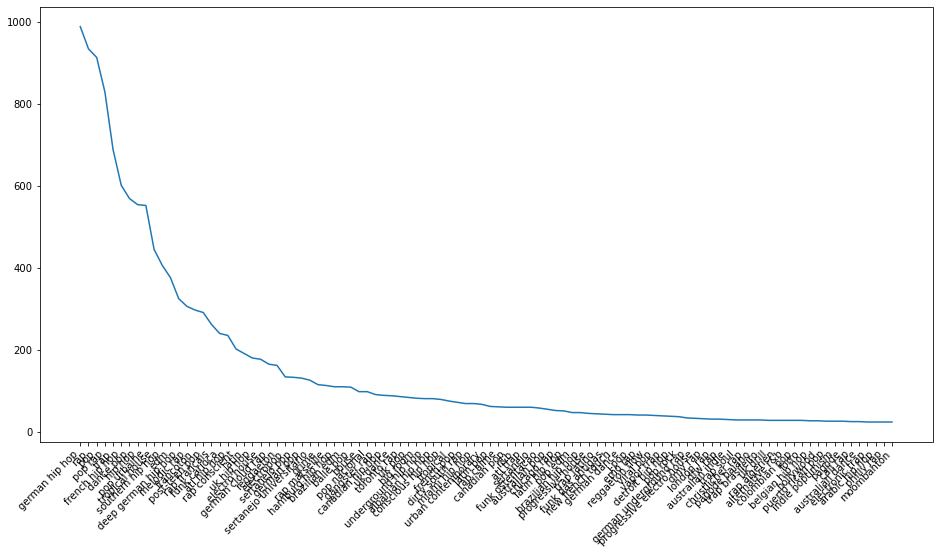

In [50]:
# printing value counts of genre_list of artist 1 to determine how many genres to take 
a1_sorted_keys = sorted(genre_counts, key=genre_counts.get, reverse=True)
import matplotlib.pyplot as plt
d={}
for r in a1_sorted_keys:
    d[r]=genre_counts[r]
d_out = dict(list(d.items())[0: 100]) 
plt.figure(figsize=(16,8))
plt.plot(list(d_out.keys()), list(d_out.values()))
plt.xticks(rotation=45, ha='right')
plt.show()
# decided to take the first 15 values, becuase after that the count reduces drastically and remains stagnant. 
# All the other values will be marked as "Others"

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer


In [52]:
# Step 2: Identify top 10 genres and categorize the rest as "Others"
top_genres = [genre for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:16]]
cat_preprocessing_df['top_genres'] = cat_preprocessing_df['genres_artist1'].apply(lambda x: [genre if genre in top_genres else 'Others' for genre in x])

# Step 3: One-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(cat_preprocessing_df['top_genres'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns="artist1_"+mlb.classes_)

# Combine the one-hot encoded data with the original DataFrame
cat_preprocessing_df = pd.concat([cat_preprocessing_df, one_hot_encoded_df], axis=1)

cat_preprocessing_df

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,0,0,"[melodic rap, rap, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,0,0,"[melodic rap, rap, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,"[deep german hip hop, german hip hop]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],79.0,79.0,2019,2,21,0,0,0,"[Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5175,54,False,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",76.0,76.0,2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5176,2,False,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",0.0,0.0,2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5177,20,False,1,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",79.0,79.0,2018,12,21,0,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### For Artist 2

In [53]:
genre_counts = {}
for genres_list in cat_preprocessing_df['genres_artist2']:
    for genre in genres_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

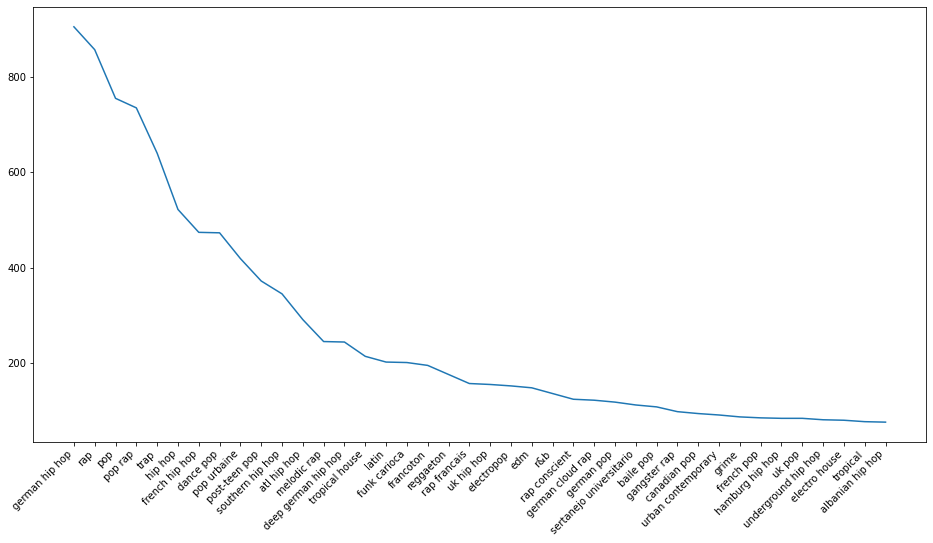

In [54]:
# printing value counts of genre_list of artist 1 to determine how many genres to take 
a1_sorted_keys = sorted(genre_counts, key=genre_counts.get, reverse=True)
import matplotlib.pyplot as plt
d={}
for r in a1_sorted_keys:
    d[r]=genre_counts[r]
d_out = dict(list(d.items())[0: 40]) 
plt.figure(figsize=(16,8))
plt.plot(list(d_out.keys()), list(d_out.values()))
plt.xticks(rotation=45, ha='right')
plt.show()
# decided to take the first 15 values, becuase after that the count reduces drastically and remains stagnant. 
# All the other values will be marked as "Others"

In [55]:
# Step 2: Identify top 10 genres and categorize the rest as "Others"
top_genres = [genre for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:16]]
cat_preprocessing_df['top_genres'] = cat_preprocessing_df['genres_artist2'].apply(lambda x: [genre if genre in top_genres else 'Others' for genre in x])

# Step 3: One-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(cat_preprocessing_df['top_genres'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns="artist2_"+mlb.classes_)

# Combine the one-hot encoded data with the original DataFrame
cat_preprocessing_df = pd.concat([cat_preprocessing_df, one_hot_encoded_df], axis=1)

cat_preprocessing_df

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],79.0,79.0,2019,2,21,0,0,0,[],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5175,54,False,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",76.0,76.0,2017,6,2,0,0,0,"[Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5176,2,False,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",0.0,0.0,2016,6,3,0,0,0,"[Others, Others, Oth

# One hot encoding for variables

In [56]:
# One hot encoding for explicit column
cat_preprocessing_df = pd.get_dummies(cat_preprocessing_df, columns = ['explicit']) 
cat_preprocessing_df.head()

,song_popularity,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1


In [57]:
cat_preprocessing_df.drop(columns=["artist_1","artist_2","genres_artist1","genres_artist2","top_genres"],axis=1, inplace=True)

In [58]:
cat_preprocessing_df

,song_popularity,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,100203,69,2905370,88,79.0,48.0,2019,6,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,100203,69,2905370,88,79.0,48.0,2019,6,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,4543729,89,2905370,88,75.0,48.0,2019,11,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,4543729,89,2905370,88,75.0,48.0,2018,11,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,146136,72,2905370,88,64.0,48.0,2017,3,24,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,62590,57,5132,48,79.0,79.0,2019,2,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5175,54,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,268970,70,254939,63,76.0,76.0,2017,6,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5176,2,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,186798,59,56258,49,0.0,0.0,2016,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5177,20,1,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,629,13,1977867,66,79.0,79.0,2018,12,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [59]:
cat_preprocessing_df.dtypes

song_popularity             object
track_number                object
duration_ms                 object
key                         object
mode                        object
                             ...  
artist2_southern hip hop     int64
artist2_trap                 int64
artist2_tropical house       int64
explicit_False               uint8
explicit_True                uint8
Length: 63, dtype: object

In [60]:
cat_preprocessing_df = cat_preprocessing_df.apply(pd.to_numeric, errors='coerce')
cat_preprocessing_df.dtypes

song_popularity             int64
track_number                int64
duration_ms                 int64
key                         int64
mode                        int64
                            ...  
artist2_southern hip hop    int64
artist2_trap                int64
artist2_tropical house      int64
explicit_False              uint8
explicit_True               uint8
Length: 63, dtype: object

In [61]:
cat_preprocessing_df

,song_popularity,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,192000,8,0,3,0.0209,0.614,0.641,0.0000,0.0659,-6.751,0.2880,0.492,123.539,100203,69,2905370,88,79.0,48.0,2019,6,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,192000,8,0,3,0.0209,0.614,0.641,0.0000,0.0659,-6.751,0.2880,0.492,123.539,100203,69,2905370,88,79.0,48.0,2019,6,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,193933,5,1,4,0.1740,0.780,0.679,0.0000,0.1270,-4.554,0.0881,0.470,139.978,4543729,89,2905370,88,75.0,48.0,2019,11,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,185828,7,1,4,0.5670,0.678,0.477,0.0000,0.1100,-9.626,0.0836,0.481,92.963,4543729,89,2905370,88,75.0,48.0,2018,11,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,224967,2,1,5,0.0275,0.405,0.653,0.0000,0.0641,-6.030,0.0677,0.208,146.991,146136,72,2905370,88,64.0,48.0,2017,3,24,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,1,163246,5,0,4,0.2400,0.764,0.468,0.0000,0.2520,-9.181,0.4460,0.756,77.044,62590,57,5132,48,79.0,79.0,2019,2,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5175,54,1,201240,6,1,4,0.4480,0.767,0.862,0.0000,0.0806,-3.157,0.0799,0.767,125.997,268970,70,254939,63,76.0,76.0,2017,6,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5176,2,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.1110,-8.136,0.0376,0.184,96.008,186798,59,56258,49,0.0,0.0,2016,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5177,20,1,178316,6,1,4,0.3080,0.603,0.900,0.0000,0.5070,-3.079,0.0792,0.861,156.193,629,13,1977867,66,79.0,79.0,2018,12,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [62]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the data
preprocessing_df_numerical = ss.fit_transform(cat_preprocessing_df)
preprocessing_df_numerical

array([[ 0.4618238 , -0.76942064, -0.33588984, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.00791193, -0.76942064, -0.33588984, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.58561795,  1.46890467, -0.29162085, ..., -0.20760952,
        -0.86890638,  0.86890638],
       ...,
       [-1.84900029, -0.56593652,  0.13801516, ..., -0.20760952,
         1.15087197, -1.15087197],
       [-1.1062354 , -0.76942064, -0.64927679, ..., -0.20760952,
         1.15087197, -1.15087197],
       [ 0.17297079,  1.06193643, -0.42200026, ..., -0.20760952,
         1.15087197, -1.15087197]])

In [63]:
preprocessing_df_numerical

array([[ 0.4618238 , -0.76942064, -0.33588984, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.00791193, -0.76942064, -0.33588984, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.58561795,  1.46890467, -0.29162085, ..., -0.20760952,
        -0.86890638,  0.86890638],
       ...,
       [-1.84900029, -0.56593652,  0.13801516, ..., -0.20760952,
         1.15087197, -1.15087197],
       [-1.1062354 , -0.76942064, -0.64927679, ..., -0.20760952,
         1.15087197, -1.15087197],
       [ 0.17297079,  1.06193643, -0.42200026, ..., -0.20760952,
         1.15087197, -1.15087197]])

## Gephi Metrics

In [64]:
# getting metrics from Gephi
import pandas as pd
from collections import Counter

# Sample data
artist_data = {'artist': ['Artist1', 'Artist2', 'Artist3'],
               'genres': [['trap soul', 'uk drill', 'uk hip hop','grime'],
                          ['trap soul', 'uk hip hop', 'grime'],
                          ['uk hip hop', 'grime']]}

# Genre to modularity class mapping
genre_modularity_mapping = {'trap soul': 5, 'uk drill': 5, 'uk hip hop': 5}#, 'grime': 0}

# Create the first dataframe
df_artists_test = pd.DataFrame(artist_data)

def calculate_modularity_class(genre_list):
    modularity_counts = Counter([genre_modularity_mapping.get(genre, -1) for genre in genre_list])
    
    # Get the modularity class with the maximum count
    max_count = max(modularity_counts.values(), default=0)
    
    # If there's a tie or no majority, choose the first modularity class
    modularity_class = [mod_class for mod_class, count in modularity_counts.items() if count == max_count]
    
    return modularity_class[0]

# Apply the function to each row
df_artists_test['modularity_class'] = df_artists_test['genres'].apply(calculate_modularity_class)

# Display the resulting dataframe
print(df_artists_test)

    artist                                    genres  modularity_class
0  Artist1  [trap soul, uk drill, uk hip hop, grime]                 5
1  Artist2            [trap soul, uk hip hop, grime]                 5
2  Artist3                       [uk hip hop, grime]                 5


In [65]:
import csv

reader = csv.DictReader(open('Gephi Stats.csv'))
genre_modularity_mapping={}
for row in reader:
    genre_modularity_mapping[row['Label']] = int(row['modularity_class'])
print(genre_modularity_mapping)

{'pop rap': 1, 'rap': 1, 'trap': 1, 'hip hop': 1, 'dance pop': 1, 'pop': 1, 'latin': 2, 'reggaeton': 2, 'southern hip hop': 1, 'atl hip hop': 1, 'post-teen pop': 1, 'tropical house': 1, 'tropical': 2, 'edm': 1, 'melodic rap': 1, 'latin hip hop': 2, 'reggaeton flow': 2, 'trap latino': 2, 'electropop': 1, 'electro house': 1, 'uk dance': 1, 'urban contemporary': 1, 'canadian pop': 1, 'r&b': 1, 'latin pop': 2, 'gangster rap': 1, 'dirty south rap': 1, 'house': 1, 'progressive house': 1, 'miami hip hop': 1, 'uk pop': 1, 'conscious hip hop': 1, 'toronto rap': 1, 'big room': 1, 'chicago rap': 1, 'indie poptimism': 1, 'puerto rican pop': 2, 'pop edm': 1, 'new orleans rap': 1, 'alternative r&b': 1, 'canadian hip hop': 1, 'colombian pop': 2, 'detroit hip hop': 1, 'atl trap': 1, 'east coast hip hop': 1, 'art pop': 1, 'hip pop': 1, 'dancehall': 1, 'canadian contemporary r&b': 1, 'underground hip hop': 1, 'baile pop': 2, 'funk carioca': 2, 'metropopolis': 1, 'indie pop rap': 1, 'pop rock': 1, 'queen

In [66]:
preprocessing_df

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,0,0,"[Others, Others, Others]"
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,0,0,"[Others, Others, Others]"
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,0,0,"[melodic rap, rap, trap]"
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,0,0,"[melodic rap, rap, trap]"
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,"[deep german hip hop, german hip hop]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],79.0,79.0,2019,2,21,0,0,0,"[Others, Others]"
5175,54,False,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",76.0,76.0,2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi..."
5176,2,False,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",0.0,0.0,2016,6,3,0,0,0,"[Others, Others, Others, tropical house]"
5177,20,False,1,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",79.0,79.0,2018,12,21,0,0,0,[]


In [67]:
def calculate_modularity_class(genre_list):
    modularity_counts = Counter([genre_modularity_mapping.get(genre, 0) for genre in genre_list])
    
    # Get the modularity class with the maximum count
    max_count = max(modularity_counts.values(), default=0)
    
    # If there's a tie or no majority, choose the first modularity class
    modularity_class = [mod_class for mod_class, count in modularity_counts.items() if count == max_count]
    
    # If there's a tie, choose the first modularity class
    if len(modularity_class) > 1:
        return modularity_class[0]
    else:
        # If there's no majority, choose the one that is not 0
        for mod_class in modularity_class:
            if mod_class != 0:
                return mod_class
        
        # If all are 0, return 0
        return 0

# Apply the function to each row
preprocessing_df['modularity_class_artist1'] = preprocessing_df['genres_artist1'].apply(calculate_modularity_class)
preprocessing_df['modularity_class_artist2'] = preprocessing_df['genres_artist2'].apply(calculate_modularity_class)

# Display the resulting dataframe
preprocessing_df

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,modularity_class_artist1,modularity_class_artist2
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,0,0,"[Others, Others, Others]",1,1
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,0,0,"[Others, Others, Others]",1,1
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,0,0,"[melodic rap, rap, trap]",1,1
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,0,0,"[melodic rap, rap, trap]",1,1
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,"[deep german hip hop, german hip hop]",3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],79.0,79.0,2019,2,21,0,0,0,"[Others, Others]",0,0
5175,54,False,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",76.0,76.0,2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi...",1,1
5176,2,False,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",0.0,0.0,2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",0,1
5177,20,False,1,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",79.0,79.0,2018,12,21,0,0,0,[],0,2


In [68]:
# ONE HOT ENCODING for modularity class
preprocessing_df = pd.get_dummies(preprocessing_df, columns=["modularity_class_artist1", "modularity_class_artist2"])

# Rename the new one-hot encoded columns
column_mapping = {
    f"modularity_class_artist1_{i}": f"genre_artist1_cluster{i}"
    for i in range(8)
}
column_mapping.update({
    f"modularity_class_artist2_{i}": f"genre_artist2_cluster{i}"
    for i in range(8)
})
preprocessing_df = preprocessing_df.rename(columns=column_mapping)
preprocessing_df

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,0,0,"[Others, Others, Others]",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,0,0,"[Others, Others, Others]",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,0,0,"[melodic rap, rap, trap]",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,0,0,"[melodic rap, rap, trap]",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,"[deep german hip hop, german hip hop]",0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],79.0,79.0,2019,2,21,0,0,0,"[Others, Others]",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5175,54,False,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",76.0,76.0,2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi...",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5176,2,False,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",0.0,0.0,2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5177,20,False,1,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",79.0,79.0,2018,12,21,0,0,0,[],1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [69]:
preprocessing_df.drop(columns=["release_date_minute","release_date_hour","release_date_second","top_genres"],axis=1,inplace=True)

In [70]:
preprocessing_df

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],79.0,79.0,2019,2,21,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5175,54,False,1,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",76.0,76.0,2017,6,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5176,2,False,2,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",0.0,0.0,2016,6,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5177,20,False,1,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",79.0,79.0,2018,12,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [71]:
import copy
bins = [0, 43, 60, 98] 
labels = ['low', 'average', 'high']
categorical_preprocessing_df = copy.deepcopy(preprocessing_df)
# Create the new categorical column
categorical_preprocessing_df["song_popularity"] = pd.cut(categorical_preprocessing_df["song_popularity"], bins=bins, labels=labels,include_lowest=True)

In [72]:
categorical_preprocessing_df["song_popularity"].value_counts()

average    1781
high       1717
low        1681
Name: song_popularity, dtype: int64

In [73]:
categorical_preprocessing_df.to_csv("Preprocessed_table_v2.csv")

In [74]:
preprocessing_df.columns

Index(['song_popularity', 'explicit', 'track_number', 'duration_ms', 'key',
       'mode', 'time_signature', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'artist_1', 'artist_2', 'followers_artist1',
       'popularity_artist1', 'genres_artist1', 'followers_artist2',
       'popularity_artist2', 'genres_artist2', 'artist1_num_available_markets',
       'artist2_num_available_markets', 'release_date_year',
       'release_date_month', 'release_date_day', 'genre_artist1_cluster0',
       'genre_artist1_cluster1', 'genre_artist1_cluster2',
       'genre_artist1_cluster3', 'genre_artist1_cluster4',
       'genre_artist1_cluster5', 'genre_artist1_cluster6',
       'genre_artist1_cluster7', 'genre_artist2_cluster0',
       'genre_artist2_cluster1', 'genre_artist2_cluster2',
       'genre_artist2_cluster3', 'genre_artist2_cluster4',
       'genre_artist2_cluster5', 'genre_artist2_cluster6',
       'genre_

In [75]:
preprocessing_df.head()

,song_popularity,explicit,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7
0,58,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,21,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47,True,1,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",79.0,48.0,2019,6,13,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,61,True,12,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2019,11,22,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,58,True,15,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",75.0,48.0,2018,11,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,41,True,6,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",64.0,48.0,2017,3,24,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
preprocessing_df = preprocessing_df.apply(pd.to_numeric, errors='coerce')
preprocessing_df.dtypes

song_popularity                    int64
explicit                            bool
track_number                       int64
duration_ms                        int64
key                                int64
mode                               int64
time_signature                     int64
acousticness                     float64
danceability                     float64
energy                           float64
instrumentalness                 float64
liveness                         float64
loudness                         float64
speechiness                      float64
valence                          float64
tempo                            float64
artist_1                         float64
artist_2                         float64
followers_artist1                  int64
popularity_artist1                 int64
genres_artist1                   float64
followers_artist2                  int64
popularity_artist2                 int64
genres_artist2                   float64
artist1_num_avai

# Feature Selection

In [77]:
# CORRELATION BETWEEN VARIABLES
import pandas as pd

# Load your dataframe (assuming it's named df)
# df = pd.read_csv('your_dataframe.csv')

# Calculate correlation matrix
correlation_matrix = preprocessing_df.corr()

# Calculate absolute correlation with the target variable
correlation_with_target = correlation_matrix['song_popularity'].abs()

# Sort the features by their correlation with the target variable in descending order
sorted_features = correlation_with_target.sort_values(ascending=False)

# Print the significant features
print("Significant features based on correlation with song_popularity:")
print(sorted_features)

Significant features based on correlation with song_popularity:
song_popularity                  1.000000
artist1_num_available_markets    0.480639
artist2_num_available_markets    0.448619
popularity_artist1               0.220431
popularity_artist2               0.218334
genre_artist1_cluster3           0.185186
genre_artist2_cluster3           0.160402
genre_artist1_cluster1           0.145702
genre_artist2_cluster1           0.143136
followers_artist1                0.121132
followers_artist2                0.119330
release_date_year                0.104251
genre_artist1_cluster2           0.084732
genre_artist2_cluster2           0.074863
genre_artist2_cluster0           0.069093
genre_artist1_cluster0           0.057966
release_date_month               0.055866
energy                           0.055411
speechiness                      0.043801
explicit                         0.037870
genre_artist1_cluster7           0.024759
genre_artist1_cluster6           0.024695
danceability

In [78]:
# FEATURE SELECTION using RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataframe (assuming it's named df)
# df = pd.read_csv('your_dataframe.csv')

# Assuming X contains the features and y contains the target variable
# Replace these with your actual feature and target variable
X = preprocessing_df.drop(columns=['song_popularity',"artist_1","artist_2","genres_artist1","genres_artist2"], axis=1)  # Features
y = preprocessing_df['song_popularity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFE
# Specify the number of features to select (e.g., 15 in this example)
num_features_to_select = 15
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)


# Fit RFE and get the selected features
fit = rfe.fit(X_train, y_train)

print("Selected Features:")
selected_features = X.columns[fit.support_]
print(selected_features)

# Print the feature ranking in descending order
print("Feature Ranking (Descending Order):")
feature_ranking = sorted(list(zip(X.columns, fit.ranking_)), key=lambda x: x[1], reverse=True)
for feature, rank in feature_ranking:
    print(f"Feature: {feature}, Rank: {rank}")

Selected Features:
Index(['energy', 'instrumentalness', 'liveness', 'valence',
       'genre_artist1_cluster0', 'genre_artist1_cluster1',
       'genre_artist1_cluster2', 'genre_artist1_cluster3',
       'genre_artist1_cluster5', 'genre_artist1_cluster6',
       'genre_artist2_cluster0', 'genre_artist2_cluster1',
       'genre_artist2_cluster3', 'genre_artist2_cluster5',
       'genre_artist2_cluster6'],
      dtype='object')
Feature Ranking (Descending Order):
Feature: genre_artist2_cluster4, Rank: 26
Feature: genre_artist1_cluster4, Rank: 25
Feature: followers_artist2, Rank: 24
Feature: followers_artist1, Rank: 23
Feature: duration_ms, Rank: 22
Feature: key, Rank: 21
Feature: track_number, Rank: 20
Feature: tempo, Rank: 19
Feature: mode, Rank: 18
Feature: release_date_day, Rank: 17
Feature: loudness, Rank: 16
Feature: popularity_artist2, Rank: 15
Feature: genre_artist2_cluster7, Rank: 14
Feature: popularity_artist1, Rank: 13
Feature: artist2_num_available_markets, Rank: 12
Feature: d

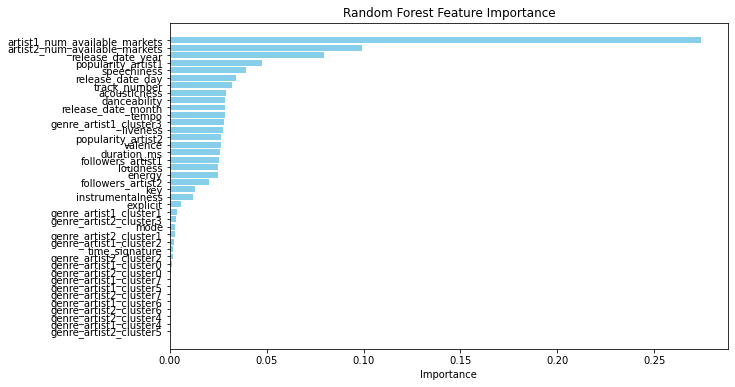

Feature Importance:
                          Feature    Importance
19  artist1_num_available_markets  2.743583e-01
20  artist2_num_available_markets  9.932025e-02
21              release_date_year  7.977662e-02
16             popularity_artist1  4.767471e-02
12                    speechiness  3.924948e-02
23               release_date_day  3.439071e-02
1                    track_number  3.216050e-02
6                    acousticness  2.892460e-02
7                    danceability  2.856774e-02
22             release_date_month  2.844030e-02
14                          tempo  2.838697e-02
27         genre_artist1_cluster3  2.781106e-02
10                       liveness  2.731690e-02
18             popularity_artist2  2.642988e-02
13                        valence  2.631200e-02
2                     duration_ms  2.580866e-02
15              followers_artist1  2.538150e-02
11                       loudness  2.474084e-02
8                          energy  2.461989e-02
17              foll

In [79]:
# random forest feature importance

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize the model (Random Forest Regressor)
randome_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
randome_forest_model.fit(X, y)

# Get feature importances
feature_importances = randome_forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()

# Print feature importances
print("Feature Importance:")
print(feature_importance_df)

# Converting explicit categorical variable into numerical using pd.get_dummies

In [80]:
# pd.get dummies on explicit columns
X_train=pd.get_dummies(X_train,columns=["explicit"])
X_train

,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7,explicit_False,explicit_True
4944,1,338660,2,0,4,0.12800,0.602,0.612,0.001870,0.2210,-7.074,0.0292,0.356,95.002,103240,52,29356,41,40.0,40.0,2018,12,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1183,2,220800,11,0,4,0.05350,0.649,0.597,0.000000,0.2010,-5.367,0.0911,0.347,149.980,460534,64,3765,62,79.0,79.0,2019,4,19,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1049,1,176416,8,1,4,0.00548,0.605,0.664,0.000003,0.2040,-7.162,0.0316,0.164,103.997,794013,79,15948075,90,79.0,70.0,2019,5,30,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1330,6,237586,7,1,4,0.23200,0.776,0.758,0.000000,0.1240,-6.636,0.2900,0.354,145.968,2262360,75,1054676,69,22.0,62.0,2018,3,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2223,1,196400,4,0,4,0.01750,0.669,0.574,0.002940,0.1460,-6.442,0.0286,0.273,120.013,3591545,87,19142628,92,53.0,66.0,2018,9,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,120346,8,0,4,0.50100,0.666,0.671,0.000004,0.3160,-8.522,0.0577,0.964,180.096,5556,42,77,29,0.0,0.0,2019,7,12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
466,2,162268,7,0,4,0.28800,0.821,0.636,0.000000,0.1040,-6.038,0.0899,0.400,142.008,3879825,92,1989635,90,71.0,61.0,2018,10,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3092,5,273893,1,0,3,0.39700,0.829,0.839,0.000000,0.1380,-6.012,0.3140,0.401,101.256,727275,74,7561,32,79.0,79.0,2018,3,9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3772,2,210533,7,1,4,0.15900,0.734,0.751,0.000000,0.3070,-4.916,0.0684,0.650,84.011,332304,63,1482590,68,79.0,41.0,2017,11,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [81]:
X_train.drop(columns=["explicit_False"],axis=1, inplace=True)
X_train

,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7,explicit_True
4944,1,338660,2,0,4,0.12800,0.602,0.612,0.001870,0.2210,-7.074,0.0292,0.356,95.002,103240,52,29356,41,40.0,40.0,2018,12,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1183,2,220800,11,0,4,0.05350,0.649,0.597,0.000000,0.2010,-5.367,0.0911,0.347,149.980,460534,64,3765,62,79.0,79.0,2019,4,19,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1049,1,176416,8,1,4,0.00548,0.605,0.664,0.000003,0.2040,-7.162,0.0316,0.164,103.997,794013,79,15948075,90,79.0,70.0,2019,5,30,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1330,6,237586,7,1,4,0.23200,0.776,0.758,0.000000,0.1240,-6.636,0.2900,0.354,145.968,2262360,75,1054676,69,22.0,62.0,2018,3,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2223,1,196400,4,0,4,0.01750,0.669,0.574,0.002940,0.1460,-6.442,0.0286,0.273,120.013,3591545,87,19142628,92,53.0,66.0,2018,9,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,120346,8,0,4,0.50100,0.666,0.671,0.000004,0.3160,-8.522,0.0577,0.964,180.096,5556,42,77,29,0.0,0.0,2019,7,12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
466,2,162268,7,0,4,0.28800,0.821,0.636,0.000000,0.1040,-6.038,0.0899,0.400,142.008,3879825,92,1989635,90,71.0,61.0,2018,10,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3092,5,273893,1,0,3,0.39700,0.829,0.839,0.000000,0.1380,-6.012,0.3140,0.401,101.256,727275,74,7561,32,79.0,79.0,2018,3,9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3772,2,210533,7,1,4,0.15900,0.734,0.751,0.000000,0.3070,-4.916,0.0684,0.650,84.011,332304,63,1482590,68,79.0,41.0,2017,11,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [82]:
# pd.get dummies on explicit columns
X_test=pd.get_dummies(X_test,columns=["explicit"])
X_test.drop(columns=["explicit_False"],axis=1, inplace=True)
X_test

,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7,explicit_True
584,1,195000,6,0,4,0.2760,0.639,0.536,0.000000,0.0846,-6.328,0.0963,0.2650,139.902,197960,67,368987,70,54.0,59.0,2018,3,30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1215,1,180609,1,1,4,0.0681,0.809,0.871,0.000000,0.1110,-4.525,0.2800,0.5730,154.957,2444602,80,17479503,91,57.0,54.0,2019,9,26,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
877,7,160320,1,1,4,0.3540,0.799,0.381,0.000003,0.1350,-7.147,0.4640,0.0488,158.021,7771400,86,1562066,85,71.0,64.0,2017,10,30,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4230,1,203906,7,1,4,0.0039,0.626,0.938,0.000452,0.5990,-3.005,0.0944,0.5180,124.932,1100976,77,40537,69,78.0,38.0,2016,12,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4159,1,129680,5,0,5,0.7010,0.275,0.386,0.000000,0.1290,-10.473,0.0327,0.2660,152.790,561,53,199964,55,24.0,0.0,2017,8,25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2,158554,11,0,4,0.5580,0.671,0.557,0.000000,0.1010,-7.710,0.2340,0.4140,93.996,1269136,80,1140736,80,48.0,50.0,2018,10,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1740,1,183673,7,0,4,0.1620,0.632,0.409,0.000000,0.0948,-8.962,0.1440,0.2900,98.690,54765,56,6925190,75,0.0,55.0,2018,7,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1717,1,194771,0,0,4,0.0748,0.648,0.795,0.000000,0.3800,-5.536,0.1700,0.5980,180.043,9080037,84,14506290,85,79.0,73.0,2019,10,30,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1454,4,148278,2,1,4,0.0646,0.901,0.676,0.000000,0.0863,-7.033,0.2510,0.4520,85.018,1931500,83,4108074,83,61.0,55.0,2019,3,22,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Standardization

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_train = pd.DataFrame(scaled_x_train, columns =X_train.columns)
print("Scaled x_trains shape:",scaled_x_train.shape)
scaled_x_test = scaler.fit_transform(X_test)
scaled_x_test = pd.DataFrame(scaled_x_test, columns =X_train.columns)
print("Scaled x_test shape:",scaled_x_test.shape)

Scaled x_trains shape: (4143, 40)
Scaled x_test shape: (1036, 40)


In [84]:
scaled_x_train

,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7,explicit_True
0,-0.773058,3.111515,-0.910590,-0.992545,0.023717,-0.434051,-0.867379,-0.481789,-0.066338,0.259404,-0.516944,-1.101618,-0.753092,-0.981919,-0.492744,-1.452970,-0.516177,-1.871030,-0.728848,-0.811909,0.108625,1.541663,-1.212822,3.025626,-0.935687,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,2.297232,-0.904821,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,-1.144837
1,-0.569565,0.335467,1.531732,-0.992545,0.023717,-0.804175,-0.501709,-0.589275,-0.111946,0.127032,0.325405,-0.621830,-0.796472,0.995487,-0.448441,-0.611619,-0.519887,-0.583070,0.922836,1.051738,0.467219,-0.912322,0.339627,-0.330510,-0.935687,-0.379683,1.510061,0.0,-0.026919,-0.026919,-0.049189,-0.435307,-0.904821,-0.365822,1.647937,0.0,-0.015538,-0.021977,-0.051596,0.873487
2,-0.773058,-0.709944,0.717625,1.007511,0.023717,-1.042743,-0.844038,-0.109171,-0.111873,0.146888,-0.560369,-1.083015,-1.678536,-0.658394,-0.407091,0.440069,1.791190,1.134209,0.922836,0.621665,0.467219,-0.605574,1.559407,-0.330510,1.068734,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,-0.435307,1.105191,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,-1.144837
3,0.244408,0.730841,0.446256,1.007511,0.023717,0.082631,0.486376,0.564408,-0.111946,-0.382599,-0.300805,0.919844,-0.762732,0.851187,-0.225020,0.159619,-0.367561,-0.153750,-1.491164,0.239379,0.108625,-1.219070,0.783183,-0.330510,-0.935687,-0.379683,1.510061,0.0,-0.026919,-0.026919,-0.049189,-0.435307,-0.904821,-0.365822,1.647937,0.0,-0.015538,-0.021977,-0.051596,0.873487
4,-0.773058,-0.239245,-0.367851,-0.992545,0.023717,-0.983027,-0.346105,-0.754087,-0.040242,-0.236990,-0.205073,-1.106268,-1.153153,-0.082343,-0.060205,1.000970,2.254230,1.256872,-0.178287,0.430522,0.108625,0.621419,0.339627,-0.330510,1.068734,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,-0.435307,1.105191,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,0.873487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,-0.773058,-2.030604,0.717625,-0.992545,0.023717,1.419050,-0.369446,-0.059011,-0.111859,0.888170,-1.231485,-0.880714,2.177481,2.078677,-0.504857,-2.154096,-0.520421,-2.607007,-2.422883,-2.723342,0.467219,0.007922,-0.436598,3.025626,-0.935687,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,2.297232,-0.904821,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,-1.144837
4139,-0.569565,-1.043183,0.446256,-0.992545,0.023717,0.360845,0.836485,-0.309812,-0.111946,-0.514971,-0.005712,-0.631132,-0.541011,0.708756,-0.024459,1.351533,-0.232041,1.134209,0.584029,0.191593,0.108625,0.928167,-1.212822,-0.330510,1.068734,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,-0.435307,1.105191,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,0.873487
4140,0.040915,1.586007,-1.181959,-0.992545,-3.615496,0.902368,0.898727,1.144832,-0.111946,-0.289939,0.007118,1.105868,-0.536191,-0.756980,-0.415366,0.089507,-0.519337,-2.423013,0.922836,1.051738,0.108625,-1.219070,-0.769265,-0.330510,-0.935687,-0.379683,1.510061,0.0,-0.026919,-0.026919,-0.049189,2.297232,-0.904821,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,0.873487
4141,-0.569565,0.093640,0.446256,1.007511,0.023717,-0.280040,0.159608,0.514247,-0.111946,0.8

In [85]:
scaled_x_test

,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7,explicit_True
0,-0.754975,-0.251133,0.169325,-0.956542,-0.006780,0.261292,-0.559619,-0.981021,-0.114613,-0.660001,-0.130694,-0.605170,-1.125367,0.595228,-0.500476,-0.444353,-0.455337,-0.046879,-0.116770,0.064082,0.100183,-1.125727,1.567608,-0.304675,-0.914811,2.616961,-0.697402,-0.031083,-0.031083,0.0,-0.05389,-0.419448,-0.898904,-0.351631,1.569995,-0.031083,-0.031083,0.0,-0.05389,0.850761
1,-0.754975,-0.549736,-1.184230,1.045433,-0.006780,-0.757713,0.760253,1.379867,-0.114613,-0.486214,0.735080,0.850320,0.337299,1.120691,-0.192621,0.529853,2.047723,1.257342,0.006296,-0.178036,0.343251,0.675436,1.121504,-0.304675,1.093122,-0.382123,-0.697402,-0.031083,-0.031083,0.0,-0.05389,-0.419448,1.112466,-0.351631,-0.636945,-0.031083,-0.031083,0.0,-0.05389,0.850761
2,0.465869,-0.970718,-1.184230,1.045433,-0.006780,0.643603,0.682613,-2.073371,-0.114531,-0.328226,-0.523966,2.308187,-2.152083,1.227634,0.537305,0.979487,-0.280804,0.884707,0.580604,0.306199,-0.142884,0.975630,1.567608,-0.304675,1.093122,-0.382123,-0.697402,-0.031083,-0.031083,0.0,-0.05389,-0.419448,1.112466,-0.351631,-0.636945,-0.031083,-0.031083,0.0,-0.05389,0.850761
3,-0.754975,-0.066340,0.440036,1.045433,-0.006780,-1.072384,-0.660550,1.852044,-0.102836,2.726209,1.464962,-0.620224,0.076108,0.072732,-0.376737,0.305036,-0.503385,-0.108985,0.867758,-0.952811,-0.385952,1.576018,-1.555121,-0.304675,1.093122,-0.382123,-0.697402,-0.031083,-0.031083,0.0,-0.05389,-0.419448,1.112466,-0.351631,-0.636945,-0.031083,-0.031083,0.0,-0.05389,-1.175419
4,-0.754975,-1.606476,-0.101386,-0.956542,3.505185,2.344395,-3.385697,-2.038134,-0.114613,-0.367723,-2.121064,-1.109085,-1.120618,1.045057,-0.527526,-1.493499,-0.480063,-0.978466,-1.347431,-2.792903,-0.142884,0.375242,1.009978,3.282183,-0.914811,-0.382123,-0.697402,-0.031083,-0.031083,0.0,-0.05389,-0.419448,1.112466,-0.351631,-0.636945,-0.031083,-0.031083,0.0,-0.05389,-1.175419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,-0.551501,-1.007361,1.522881,-0.956542,-0.006780,1.643492,-0.311173,-0.833025,-0.114613,-0.552043,-0.794311,0.485853,-0.417779,-1.007023,-0.353694,0.529853,-0.342439,0.574179,-0.362902,-0.371730,0.100183,0.975630,-1.220543,-0.304675,-0.914811,-0.382123,1.433892,-0.031083,-0.031083,0.0,-0.05389,-0.419448,-0.898904,-0.351631,1.569995,-0.031083,-0.031083,0.0,-0.05389,0.850761
1032,-0.754975,-0.486160,0.440036,-0.956542,-0.006780,-0.297470,-0.613967,-1.876044,-0.114613,-0.592856,-1.395503,-0.227234,-1.006644,-0.843189,-0.520098,-1.268682,0.503756,0.263650,-2.331959,-0.129612,0.100183,0.075048,-1.443595,-0.304675,-0.914811,2.616961,-0.697402,-0.031083,-0.031083,0.0,-0.05389,-0.419448,-0.898904,2.843892,-0.636945,-0.031083,-0.031083,0.0,-0.05389,-1.175419
1033,-0.754975,-0.255885,-1.454941,-0.956542,-0.006780,-0.724873,-0.489743,0.844262,-0.114613,1.284569,0.249613,-0.021231,0.456021,1.996265,0.716626,0.829609,1.612778,0.884707,0.908780,0.742010,0.343251,0.975630,1.567608,-0.304675,-0.914811,2.616961,-0.697402,-0.031083,-0.031083,0.0,-0.05389,2.384087,-0.898904,-0.351631,-0.636945,-0.031083,-0.031083,0.0,-0.05389,-1.175419
1034,-0.144553,-1.220581,-0.913519,1.045433,-0.006780,-0.774868,1.474536,0.005619,-0.114613,-0.648810,-

## Multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data1 = pd.DataFrame()
vif_data1['feature'] = X_train.columns
vif_data1['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data1=(vif_data1.sort_values(by=["VIF"],ascending=False))

/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [87]:
vif_data1

,feature,VIF
24,genre_artist1_cluster1,inf
25,genre_artist1_cluster2,inf
38,genre_artist2_cluster7,inf
37,genre_artist2_cluster6,inf
36,genre_artist2_cluster5,inf
34,genre_artist2_cluster3,inf
33,genre_artist2_cluster2,inf
32,genre_artist2_cluster1,inf
31,genre_artist2_cluster0,inf
23,genre_artist1_cluster0,inf


# Model Training using Linear Regression

In [88]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [89]:
# linear regression using sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (Linear Regression)
linear_regression_model = LinearRegression()

# Fit the model
linear_regression_model.fit(scaled_x_train, y_train)

print("Linear regression r-squared = ",linear_regression_model.score(scaled_x_train,y_train)) # R2 for training dataset 
print("Linear Regression adjusted r-squared: ",adj_r2(scaled_x_train,y_train,linear_regression_model)) #adjusted R2 for training dataset 


print("R-squared of Test accuracy: ",linear_regression_model.score(scaled_x_test,y_test)) #Test Accurtacy (r-Square value)
print("Adjusted R-squared of Test accuracy: ",adj_r2(scaled_x_test,y_test,linear_regression_model)) #Test Accurtacy (Adjusted r-Square value)
print("Mean Squared error of Test accuracy: ",mean_squared_error(y_test,linear_regression_model.predict(scaled_x_test)))


Linear regression r-squared =  0.35480550431331903
Linear Regression adjusted r-squared:  0.34851399289755425
R-squared of Test accuracy:  -1.7419184829036744e+23
Adjusted R-squared of Test accuracy:  -1.811945356588244e+23
Mean Squared error of Test accuracy:  9.580176167512034e+25


In [90]:
# Linear Regression analysis using statsmodel library
import statsmodels.api as sm
model = sm.OLS(y_train.values, sm.add_constant(scaled_x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     62.73
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:47:55   Log-Likelihood:                -18210.
No. Observations:                4143   AIC:                         3.649e+04
Df Residuals:                    4106   BIC:                         3.673e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [91]:
# backward stepwise regression:
flag=True
remaining_columns=scaled_x_train.columns
backward_stepwise_dataframe_results=pd.DataFrame(columns=["Columns/Features","AIC","BIC","Adjusted R-squared"])
while flag:
    model = sm.OLS(y_train.values, sm.add_constant(scaled_x_train[remaining_columns])).fit()
    if(model.pvalues.sort_values(ascending=False)[0]>0.05):
        column_to_remove = (model.pvalues.sort_values(ascending=False).head(1).index[0])
        remaining_columns=remaining_columns.difference(column_to_remove.split())
        backward_stepwise_dataframe_results=pd.concat([backward_stepwise_dataframe_results,(pd.DataFrame([[remaining_columns,model.aic,model.bic, model.rsquared_adj]],
                                    columns=["Columns/Features","AIC","BIC","Adjusted R-squared"]))],axis=0,ignore_index=True)

    else:
        print("FINAL:")
        print("Remaining Columns: ", remaining_columns)
        print("Columns eliminated: ", scaled_x_train.columns.difference(remaining_columns))
        flag = False


pd.set_option('display.max_colwidth', None)
backward_stepwise_dataframe_results

FINAL:
Remaining Columns:  Index(['artist1_num_available_markets', 'artist2_num_available_markets',
       'duration_ms', 'explicit_True', 'genre_artist1_cluster3',
       'genre_artist1_cluster5', 'genre_artist1_cluster6', 'liveness',
       'popularity_artist1', 'popularity_artist2', 'release_date_day',
       'release_date_month', 'release_date_year', 'tempo'],
      dtype='object')
Columns eliminated:  Index(['acousticness', 'danceability', 'energy', 'followers_artist1',
       'followers_artist2', 'genre_artist1_cluster0', 'genre_artist1_cluster1',
       'genre_artist1_cluster2', 'genre_artist1_cluster4',
       'genre_artist1_cluster7', 'genre_artist2_cluster0',
       'genre_artist2_cluster1', 'genre_artist2_cluster2',
       'genre_artist2_cluster3', 'genre_artist2_cluster4',
       'genre_artist2_cluster5', 'genre_artist2_cluster6',
       'genre_artist2_cluster7', 'instrumentalness', 'key', 'loudness', 'mode',
       'speechiness', 'time_signature', 'track_number', 'valence'

,Columns/Features,AIC,BIC,Adjusted R-squared
0,"Index(['acousticness', 'artist1_num_available_markets', 'artist2_num_available_markets', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'followers_artist1', 'followers_artist2', 'genre_artist1_cluster0', 'genre_artist1_cluster1', 'genre_artist1_cluster2', 'genre_artist1_cluster3', 'genre_artist1_cluster4', 'genre_artist1_cluster5', 'genre_artist1_cluster6', 'genre_artist1_cluster7', 'genre_artist2_cluster0', 'genre_artist2_cluster1', 'genre_artist2_cluster3', 'genre_artist2_cluster4', 'genre_artist2_cluster5', 'genre_artist2_cluster6', 'genre_artist2_cluster7', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",36494.093091,36728.272583,0.349195
1,"Index(['acousticness', 'artist1_num_available_markets', 'artist2_num_available_markets', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'followers_artist1', 'followers_artist2', 'genre_artist1_cluster0', 'genre_artist1_cluster1', 'genre_artist1_cluster2', 'genre_artist1_cluster3', 'genre_artist1_cluster4', 'genre_artist1_cluster5', 'genre_artist1_cluster6', 'genre_artist1_cluster7', 'genre_artist2_cluster0', 'genre_artist2_cluster1', 'genre_artist2_cluster3', 'genre_artist2_cluster4', 'genre_artist2_cluster5', 'genre_artist2_cluster6', 'genre_artist2_cluster7', 'instrumentalness', 'key', 'liveness', 'loudness', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",36494.093091,36728.272583,0.349195
2,"Index(['acousticness', 'artist1_num_available_markets', 'artist2_num_available_markets', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'followers_artist1', 'followers_artist2', 'genre_artist1_cluster0', 'genre_artist1_cluster1', 'genre_artist1_cluster2', 'genre_artist1_cluster3', 'genre_artist1_cluster4', 'genre_artist1_cluster5', 'genre_artist1_cluster6', 'genre_artist1_cluster7', 'genre_artist2_cluster0', 'genre_artist2_cluster3', 'genre_artist2_cluster4', 'genre_artist2_cluster5', 'genre_artist2_cluster6', 'genre_artist2_cluster7', 'instrumentalness', 'key', 'liveness', 'loudness', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",36492.093228,36719.943544,0.349353
3,"Index(['acousticness', 'artist1_num_available_markets', 'artist2_num_available_markets', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'followers_artist1', 'followers_artist2', 'genre_artist1_cluster0', 'genre_artist1_cluster1', 'genre_artist1_cluster2', 'genre_artist1_cluster3', 'genre_artist1_cluster4', 'genre_artist1_cluster5', 'genre_artist1_cluster6', 'genre_artist1_cluster7', 'genre_artist2_cluster0', 'genre_artist2_cluster3', 'genre_artist2_cluster4', 'genre_artist2_cluster5', 'genre_artist2_cluster6', 'genre_artist2_cluster7', 'instrumentalness', 'liveness', 'loudness', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",36490.100231,36711.621372,0.34951
4,"Index(['acousticness', 'artist1_num_available_markets', 'artist2_num_available_markets', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'followers_artist1', 'followers_artist2', 'genre_artist1_cluster0', 'genre_artist1_cluster1', 'genre_artist1_cluster3', 'genre_artist1_cluster4', 'genre_artist1_cluster5', 'genre_artist1_cluster6', 'genre_artist1_cluster7', 'genre_artist2_cluster0', 'genre_artist2_cluster3', 'genre_artist2_cluster4', 'genre_artist2_cluster5', 'genre_artist2_cluster6', 'genre_artist2_cluster7', 'instrumentalness', 'liveness

In [92]:
print("Final OLS with columns: ",remaining_columns)
model = sm.OLS(y_train.values, sm.add_constant(scaled_x_train[remaining_columns])).fit()
print(model.summary())

Final OLS with columns:  Index(['artist1_num_available_markets', 'artist2_num_available_markets',
       'duration_ms', 'explicit_True', 'genre_artist1_cluster3',
       'genre_artist1_cluster5', 'genre_artist1_cluster6', 'liveness',
       'popularity_artist1', 'popularity_artist2', 'release_date_day',
       'release_date_month', 'release_date_year', 'tempo'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     160.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:47:56   Log-Likelihood:                -18220.
No. Observations:                4143   AIC:                         3.647e+04
Df Residuals:                    4128   BIC:                

In [93]:
# Lasso regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(scaled_x_train[remaining_columns],y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-389.33271205782523


/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.523e+05, tolerance: 1.994e+02
  model = cd_fast.enet_coordinate_descent(
/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+05, tolerance: 1.979e+02
  model = cd_fast.enet_coordinate_descent(
/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

In [94]:
lasso_alpha=0.01

lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(scaled_x_train[remaining_columns], y_train)

r2=lasso_reg.score(scaled_x_train[remaining_columns],y_train)
print("R-squared of lasso of training data:",r2)
print("Adjusted r-squared of lasso of training data:",adj_r2(scaled_x_train[remaining_columns],y_train,lasso_reg))

print("Adjusted r-squared of lasso of testing data:",adj_r2(scaled_x_test[remaining_columns],y_test,lasso_reg))

R-squared of lasso of training data: 0.3517021913371491
Adjusted r-squared of lasso of training data: 0.3495035069085445
Adjusted r-squared of lasso of testing data: 0.32940121583595516


In [95]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(scaled_x_train[remaining_columns],y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-389.35047359985134


In [96]:
Ridge_alpha=1 #best alpha value
ridge_reg = Lasso(Ridge_alpha)
ridge_reg.fit(scaled_x_train[remaining_columns], y_train)
r2=ridge_reg.score(scaled_x_train[remaining_columns],y_train)
print("R-squared of ridge with training data:",r2)
print("Adjusted r-squared of ridge with training data:",adj_r2(scaled_x_train[remaining_columns],y_train,ridge_reg))
print("Adjusted r-squared of ridge with test data",adj_r2(scaled_x_test[remaining_columns],y_test,ridge_reg))

R-squared of ridge with training data: 0.33589064318636275
Adjusted r-squared of ridge with training data: 0.33363833432120027
Adjusted r-squared of ridge with test data 0.3302258419308446


In [97]:
# elastic net
from sklearn.linear_model  import  ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =5)

elasticCV.fit(scaled_x_train[remaining_columns], y_train)

elastic_alpha=elasticCV.alpha_
print(elastic_alpha)
from sklearn.linear_model  import  ElasticNet
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(scaled_x_train[remaining_columns], y_train)

0.043580952976731195


ElasticNet(alpha=0.043580952976731195)

In [98]:
print("R-squared with elastic net for training data",elasticnet_reg.score(scaled_x_train[remaining_columns], y_train))
print("R-squared with elastic net for test data",elasticnet_reg.score(scaled_x_test[remaining_columns], y_test))
print("Adjusted R-squared with elastic net for training data",adj_r2(scaled_x_train[remaining_columns],y_train,elasticnet_reg))
print("Adjusted R-squared with elastic net for test data",adj_r2(scaled_x_test[remaining_columns], y_test,elasticnet_reg))

R-squared with elastic net for training data 0.351591461027005
R-squared with elastic net for test data 0.3388420650917009
Adjusted R-squared with elastic net for training data 0.3493924010595578
Adjusted R-squared with elastic net for test data 0.3297762364053971


## Tree based algorithms

In [99]:
# pip install xgboost

In [100]:
# XGBOOST

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model (Decision Tree Regressor)
xgboost_model = XGBRegressor(random_state=42)

# Fit the model
xgboost_model.fit(X_train, y_train)

# Predict using the model
y_pred = xgboost_model.predict(X_test)

# Calculate mean squared error and R-squared
mse_decision_trees = mean_squared_error(y_test, y_pred)
r2_decision_trees = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error of the decision trees model:", mse_decision_trees)
print("R-squared of the decision trees model:", r2_decision_trees)

n = len(y_test)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2_decision_trees) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error of the decision trees model: 352.03703815793097
R-squared of the decision trees model: 0.35990757089259373
Adjusted R-squared: 0.3341752119335021


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data1 = pd.DataFrame()
vif_data1['feature'] = X_train[remaining_columns].columns
vif_data1['VIF'] = [variance_inflation_factor(X_train[remaining_columns].values, i) for i in range(len(X_train[remaining_columns].columns))]
vif_data1=(vif_data1.sort_values(by=["VIF"],ascending=False))

In [102]:
vif_data1

,feature,VIF
12,release_date_year,93.351065
8,popularity_artist1,32.358995
9,popularity_artist2,25.581282
2,duration_ms,24.986615
13,tempo,20.537054
1,artist2_num_available_markets,13.141804
0,artist1_num_available_markets,10.702332
11,release_date_month,5.626452
10,release_date_day,4.145468
3,explicit_True,2.628068


# Classification conversion

In [103]:
y_train.describe()

count    4143.000000
mean       46.917692
std        24.427174
min         0.000000
25%        37.000000
50%        53.000000
75%        64.000000
max        98.000000
Name: song_popularity, dtype: float64

In [104]:
bins = [0, 40, 60, 98] 
labels = ['low', 'average', 'high']

# Create the new categorical column
y_train = pd.cut(y_train, bins=bins, labels=labels,include_lowest=True)
y_test = pd.cut(y_test, bins=bins, labels=labels,include_lowest=True)

# Display the updated DataFrame
y_train

4944        low
1183    average
1049       high
1330    average
2223        low
         ...   
4426        low
466        high
3092        low
3772    average
860     average
Name: song_popularity, Length: 4143, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

In [105]:
y_train.value_counts()

average    1549
high       1400
low        1194
Name: song_popularity, dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(max_iter=1000)  # You may choose a different classification algorithm

# Fit the model on the training data
model.fit(scaled_x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(scaled_x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and a classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6187258687258688
Classification Report:
               precision    recall  f1-score   support

     average       0.66      0.58      0.62       431
        high       0.57      0.73      0.64       317
         low       0.63      0.56      0.59       288

    accuracy                           0.62      1036
   macro avg       0.62      0.62      0.62      1036
weighted avg       0.63      0.62      0.62      1036



In [107]:
scaled_x_train#[remaining_columns]

,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7,explicit_True
0,-0.773058,3.111515,-0.910590,-0.992545,0.023717,-0.434051,-0.867379,-0.481789,-0.066338,0.259404,-0.516944,-1.101618,-0.753092,-0.981919,-0.492744,-1.452970,-0.516177,-1.871030,-0.728848,-0.811909,0.108625,1.541663,-1.212822,3.025626,-0.935687,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,2.297232,-0.904821,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,-1.144837
1,-0.569565,0.335467,1.531732,-0.992545,0.023717,-0.804175,-0.501709,-0.589275,-0.111946,0.127032,0.325405,-0.621830,-0.796472,0.995487,-0.448441,-0.611619,-0.519887,-0.583070,0.922836,1.051738,0.467219,-0.912322,0.339627,-0.330510,-0.935687,-0.379683,1.510061,0.0,-0.026919,-0.026919,-0.049189,-0.435307,-0.904821,-0.365822,1.647937,0.0,-0.015538,-0.021977,-0.051596,0.873487
2,-0.773058,-0.709944,0.717625,1.007511,0.023717,-1.042743,-0.844038,-0.109171,-0.111873,0.146888,-0.560369,-1.083015,-1.678536,-0.658394,-0.407091,0.440069,1.791190,1.134209,0.922836,0.621665,0.467219,-0.605574,1.559407,-0.330510,1.068734,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,-0.435307,1.105191,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,-1.144837
3,0.244408,0.730841,0.446256,1.007511,0.023717,0.082631,0.486376,0.564408,-0.111946,-0.382599,-0.300805,0.919844,-0.762732,0.851187,-0.225020,0.159619,-0.367561,-0.153750,-1.491164,0.239379,0.108625,-1.219070,0.783183,-0.330510,-0.935687,-0.379683,1.510061,0.0,-0.026919,-0.026919,-0.049189,-0.435307,-0.904821,-0.365822,1.647937,0.0,-0.015538,-0.021977,-0.051596,0.873487
4,-0.773058,-0.239245,-0.367851,-0.992545,0.023717,-0.983027,-0.346105,-0.754087,-0.040242,-0.236990,-0.205073,-1.106268,-1.153153,-0.082343,-0.060205,1.000970,2.254230,1.256872,-0.178287,0.430522,0.108625,0.621419,0.339627,-0.330510,1.068734,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,-0.435307,1.105191,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,0.873487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,-0.773058,-2.030604,0.717625,-0.992545,0.023717,1.419050,-0.369446,-0.059011,-0.111859,0.888170,-1.231485,-0.880714,2.177481,2.078677,-0.504857,-2.154096,-0.520421,-2.607007,-2.422883,-2.723342,0.467219,0.007922,-0.436598,3.025626,-0.935687,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,2.297232,-0.904821,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,-1.144837
4139,-0.569565,-1.043183,0.446256,-0.992545,0.023717,0.360845,0.836485,-0.309812,-0.111946,-0.514971,-0.005712,-0.631132,-0.541011,0.708756,-0.024459,1.351533,-0.232041,1.134209,0.584029,0.191593,0.108625,0.928167,-1.212822,-0.330510,1.068734,-0.379683,-0.662225,0.0,-0.026919,-0.026919,-0.049189,-0.435307,1.105191,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,0.873487
4140,0.040915,1.586007,-1.181959,-0.992545,-3.615496,0.902368,0.898727,1.144832,-0.111946,-0.289939,0.007118,1.105868,-0.536191,-0.756980,-0.415366,0.089507,-0.519337,-2.423013,0.922836,1.051738,0.108625,-1.219070,-0.769265,-0.330510,-0.935687,-0.379683,1.510061,0.0,-0.026919,-0.026919,-0.049189,2.297232,-0.904821,-0.365822,-0.606819,0.0,-0.015538,-0.021977,-0.051596,0.873487
4141,-0.569565,0.093640,0.446256,1.007511,0.023717,-0.280040,0.159608,0.514247,-0.111946,0.8

In [108]:
y_train.replace({'low': 0, 'average': 1, 'high': 2}, inplace=True)
y_test.replace({'low': 0, 'average': 1, 'high': 2}, inplace=True)
y_train

4944    0
1183    1
1049    2
1330    1
2223    0
       ..
4426    0
466     2
3092    0
3772    1
860     1
Name: song_popularity, Length: 4143, dtype: category
Categories (3, int64): [0 < 1 < 2]

## XGBOOST CLASSIFIER

In [124]:
X_train

,track_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,artist1_num_available_markets,artist2_num_available_markets,release_date_year,release_date_month,release_date_day,genre_artist1_cluster0,genre_artist1_cluster1,genre_artist1_cluster2,genre_artist1_cluster3,genre_artist1_cluster4,genre_artist1_cluster5,genre_artist1_cluster6,genre_artist1_cluster7,genre_artist2_cluster0,genre_artist2_cluster1,genre_artist2_cluster2,genre_artist2_cluster3,genre_artist2_cluster4,genre_artist2_cluster5,genre_artist2_cluster6,genre_artist2_cluster7,explicit_True
4944,1,338660,2,0,4,0.12800,0.602,0.612,0.001870,0.2210,-7.074,0.0292,0.356,95.002,103240,52,29356,41,40.0,40.0,2018,12,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1183,2,220800,11,0,4,0.05350,0.649,0.597,0.000000,0.2010,-5.367,0.0911,0.347,149.980,460534,64,3765,62,79.0,79.0,2019,4,19,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1049,1,176416,8,1,4,0.00548,0.605,0.664,0.000003,0.2040,-7.162,0.0316,0.164,103.997,794013,79,15948075,90,79.0,70.0,2019,5,30,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1330,6,237586,7,1,4,0.23200,0.776,0.758,0.000000,0.1240,-6.636,0.2900,0.354,145.968,2262360,75,1054676,69,22.0,62.0,2018,3,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2223,1,196400,4,0,4,0.01750,0.669,0.574,0.002940,0.1460,-6.442,0.0286,0.273,120.013,3591545,87,19142628,92,53.0,66.0,2018,9,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,120346,8,0,4,0.50100,0.666,0.671,0.000004,0.3160,-8.522,0.0577,0.964,180.096,5556,42,77,29,0.0,0.0,2019,7,12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
466,2,162268,7,0,4,0.28800,0.821,0.636,0.000000,0.1040,-6.038,0.0899,0.400,142.008,3879825,92,1989635,90,71.0,61.0,2018,10,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3092,5,273893,1,0,3,0.39700,0.829,0.839,0.000000,0.1380,-6.012,0.3140,0.401,101.256,727275,74,7561,32,79.0,79.0,2018,3,9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3772,2,210533,7,1,4,0.15900,0.734,0.751,0.000000,0.3070,-4.916,0.0684,0.650,84.011,332304,63,1482590,68,79.0,41.0,2017,11,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [118]:
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()

model.fit(X_train, y_train)

# cheking training accuracy
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6708494208494209

In [ ]:
print(model.feature_importances_)


In [110]:
from sklearn.model_selection import GridSearchCV
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200,300,400]
    
}
grid= GridSearchCV(XGBClassifier(),param_grid, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.633 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.666 total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.633 total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.661 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.639 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.632 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.673 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.636 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.640 total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.632 total time=   0.2s
[CV 1/5] END lear

[CV 4/5] END learning_rate=1, max_depth=10, n_estimators=400;, score=0.649 total time=   3.9s
[CV 5/5] END learning_rate=1, max_depth=10, n_estimators=400;, score=0.647 total time=   3.1s
[CV 1/5] END learning_rate=1, max_depth=20, n_estimators=10;, score=0.619 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=20, n_estimators=10;, score=0.673 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=20, n_estimators=10;, score=0.626 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=20, n_estimators=10;, score=0.635 total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=20, n_estimators=10;, score=0.646 total time=   0.2s
[CV 1/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.632 total time=   0.8s
[CV 2/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.682 total time=   0.8s
[CV 3/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.632 total time=   0.7s
[CV 4/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=

[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=400;, score=0.615 total time=   2.4s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=400;, score=0.685 total time=   2.4s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=400;, score=0.627 total time=   2.4s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=400;, score=0.659 total time=   2.4s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=400;, score=0.639 total time=   2.4s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.636 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.680 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.628 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.653 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.647 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_es

[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.695 total time=   1.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.632 total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.679 total time=   1.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.663 total time=   1.1s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=400;, score=0.632 total time=   1.5s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=400;, score=0.703 total time=   1.5s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=400;, score=0.626 total time=   1.5s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=400;, score=0.673 total time=   1.5s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=400;, score=0.662 total time=   1.7s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.639 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_esti

[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.669 total time=   3.8s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.645 total time=   3.7s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=300;, score=0.648 total time=   5.1s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=300;, score=0.690 total time=   5.6s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=300;, score=0.636 total time=   5.2s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=300;, score=0.674 total time=   5.8s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=300;, score=0.640 total time=   5.7s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=400;, score=0.650 total time=   6.4s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=400;, score=0.694 total time=   6.8s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=400;, score=0.628 total time=   6.7s
[CV 4/5] END learning_rate=0.1, max_dept

[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.647 total time=   1.8s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.650 total time=   3.3s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.683 total time=   3.5s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.632 total time=   3.5s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.662 total time=   3.6s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.640 total time=   3.3s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=300;, score=0.644 total time=   4.9s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=300;, score=0.692 total time=   5.4s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=300;, score=0.641 total time=   5.9s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=300;, score=0.675 total time=   6.4s
[CV 5/5] END learning_rate=0.0

[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.630 total time=   0.4s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.626 total time=   0.7s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.657 total time=   0.8s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.621 total time=   0.8s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.652 total time=   0.8s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.635 total time=   0.8s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.633 total time=   1.6s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.654 total time=   1.6s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.621 total time=   1.6s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.653 total time=   1.6s
[CV 5/5] END learning_rate=0.00

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

In [111]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [120]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100)
new_model.fit(X_train, y_train)
y_pred_new = new_model.predict(X_test)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(y_test,predictions_new)
accuracy_new

0.666023166023166

In [121]:

y_pred_new = new_model.predict(X_train)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(y_train,predictions_new)
accuracy_new

0.853487810765146

In [123]:
print("Classification Report:\n", classification_report(y_test, new_model.predict(X_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68       288
           1       0.69      0.64      0.67       431
           2       0.63      0.67      0.65       317

    accuracy                           0.67      1036
   macro avg       0.66      0.67      0.67      1036
weighted avg       0.67      0.67      0.67      1036



In [115]:
y_test.value_counts(normalize=True)

1    0.416023
2    0.305985
0    0.277992
Name: song_popularity, dtype: float64

In [116]:
y_train.value_counts(normalize=True)

1    0.373884
2    0.337919
0    0.288197
Name: song_popularity, dtype: float64

# CATBOOST

In [127]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(silent=True)
catboost.fit(X_train,y_train)

# cheking training accuracy
y_pred = catboost.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6708494208494209

In [135]:
#create the grid
grid = {'max_depth': [3,4,5,6,7,8,9],'n_estimators':[100, 200, 300]}

cbc = CatBoostClassifier(silent=True)

#instantiate  GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring = "roc_auc_ovr"
, cv = 5)

#fit the model using grid search
gscv.fit(X_train,y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)




0.8489245086016327
{'max_depth': 4, 'n_estimators': 300}


In [136]:
catboost_tuned = CatBoostClassifier(max_depth = 4,n_estimators=300,silent=True)
catboost_tuned.fit(X_train,y_train)

y_pred = catboost_tuned.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
accuracy


0.6708494208494209